In [9]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

In [60]:
base_path = Path("../dataset/DepthMapDBH2023/")
test_csv = "test/test/files_with_depth_maps_DA3_LARGE.csv"
train_csv = "train/train/files_with_depth_maps_DA3_LARGE.csv"

df_train = pd.read_csv(base_path / train_csv)
df_test = pd.read_csv(base_path / test_csv)

In [21]:
df_train.describe(), df_test.describe()

(               DBH
 count  1008.000000
 mean     32.564238
 std      25.713775
 min       0.000000
 25%      13.050705
 50%      25.464790
 75%      46.871130
 max     127.960570,
               DBH
 count  164.000000
 mean    34.384261
 std     31.406937
 min      0.000000
 25%     10.504227
 50%     20.530988
 75%     61.592965
 max    109.180290)

In [64]:
len(df_train), len(df_test)

(1008, 164)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def before_after_minmax_plot(df_train, df_test, bins=50):
    # remove invalid DBH
    df_train = df_train[df_train["DBH"] > 0]
    df_test = df_test[df_test["DBH"] > 0]

    train_dbh = df_train["DBH"].values
    test_dbh = df_test["DBH"].values

    # ------------------
    # Fit scaler on TRAIN only
    # ------------------
    dbh_min = train_dbh.min()
    dbh_max = train_dbh.max()

    train_scaled = (train_dbh - dbh_min) / (dbh_max - dbh_min)
    test_scaled = (test_dbh - dbh_min) / (dbh_max - dbh_min)

    fig, axes = plt.subplots(2, 3, figsize=(15, 8))

    # ------------------
    # Train hist (raw)
    # ------------------
    axes[0, 0].hist(train_dbh, bins=bins)
    axes[0, 0].set_title("Train DBH (Raw)")
    axes[0, 0].set_xlabel("DBH")
    axes[0, 0].set_ylabel("Count")

    # ------------------
    # Train hist (min-max)
    # ------------------
    axes[0, 1].hist(train_scaled, bins=bins)
    axes[0, 1].set_title("Train DBH (Min–Max)")
    axes[0, 1].set_xlabel("Scaled DBH")

    # ------------------
    # Train scatter
    # ------------------
    axes[0, 2].scatter(train_dbh, train_scaled, s=10, alpha=0.4)
    axes[0, 2].set_title("Train: Raw vs Min–Max")
    axes[0, 2].set_xlabel("DBH")
    axes[0, 2].set_ylabel("Scaled DBH")

    # ------------------
    # Test hist (raw)
    # ------------------
    axes[1, 0].hist(test_dbh, bins=bins)
    axes[1, 0].set_title("Test DBH (Raw)")
    axes[1, 0].set_xlabel("DBH")
    axes[1, 0].set_ylabel("Count")

    # ------------------
    # Test hist (min-max)
    # ------------------
    axes[1, 1].hist(test_scaled, bins=bins)
    axes[1, 1].set_title("Test DBH (Min–Max)")
    axes[1, 1].set_xlabel("Scaled DBH")

    # ------------------
    # Test scatter
    # ------------------
    axes[1, 2].scatter(test_dbh, test_scaled, s=10, alpha=0.4)
    axes[1, 2].set_title("Test: Raw vs Min–Max")
    axes[1, 2].set_xlabel("DBH")
    axes[1, 2].set_ylabel("Scaled DBH")

    plt.tight_layout()
    plt.show()




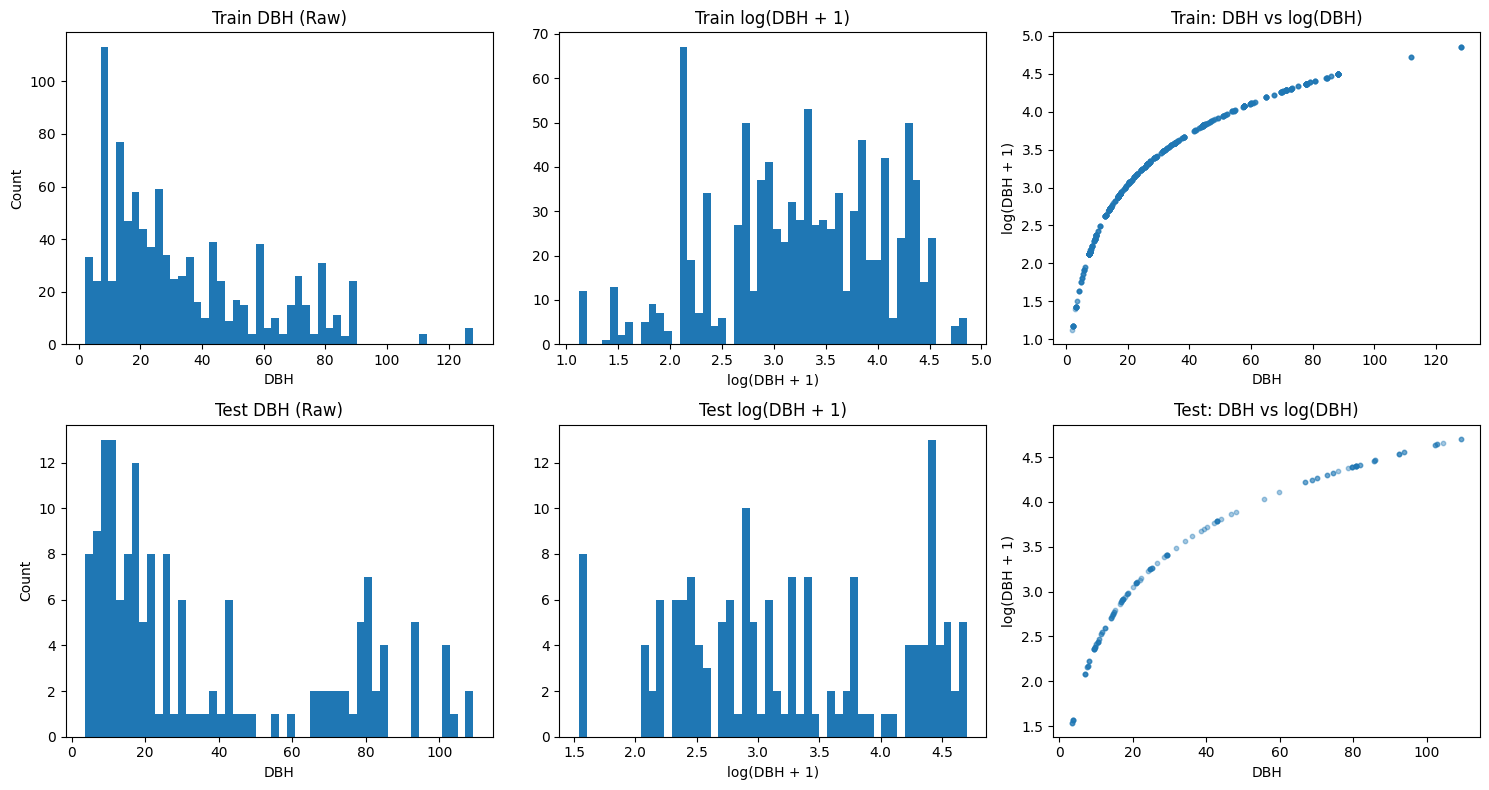

In [59]:
before_after_normalization_plot(df_train, df_test, bins=50)

### Resplit Dataframe

In [49]:

from PIL import Image

def show_random_images(df, base_path, k=8):
    if len(df) == 0:
        print("DataFrame is empty")
        return

    k = min(k, len(df))
    samples = df.sample(k)

    cols = min(4, k)
    rows = (k + cols - 1) // cols

    fig, axes = plt.subplots(rows, cols, figsize=(1 * cols, 1 * rows))
    axes = axes.flatten() if k > 1 else [axes]

    for ax, (_, row) in zip(axes, samples.iterrows()):
        img_path = Path(base_path) / row["image_path"]
        img = Image.open(img_path).convert("RGB")

        ax.imshow(img)
        ax.set_title(row["image_path"], fontsize=8)
        ax.axis("off")

    # hide unused axes
    for ax in axes[len(samples):]:
        ax.axis("off")

    plt.tight_layout()
    plt.show()

In [50]:
df_train

,image_path,depth_map_path,DBH,depth_anything_maps_path
0,train/images/0.jpg,train/depth_maps/0.png,3.023944,train\train\depth_anything_maps\DA3-LARGE\trai...
1,train/images/1.jpg,train/depth_maps/1.png,2.069014,train\train\depth_anything_maps\DA3-LARGE\trai...
2,train/images/2.jpg,train/depth_maps/2.png,2.228169,train\train\depth_anything_maps\DA3-LARGE\trai...
3,train/images/3.jpg,train/depth_maps/3.png,14.960565,train\train\depth_anything_maps\DA3-LARGE\trai...
4,train/images/4.jpg,train/depth_maps/4.png,15.915494,train\train\depth_anything_maps\DA3-LARGE\trai...
...,...,...,...,...
1003,train/images/1003.jpg,train/depth_maps/1003.png,14.005635,train\train\depth_anything_maps\DA3-LARGE\trai...
1004,train/images/1004.jpg,train/depth_maps/1004.png,38.197186,train\train\depth_anything_maps\DA3-LARGE\trai...
1005,train/images/1005.jpg,train/depth_maps/1005.png,38.197186,train\train\depth_anything_maps\DA3-LARGE\trai...
1006,train/images/1006.jpg,train/depth_maps/1006.png,38.197186,train\train\depth_anything_maps\DA3-LARGE\trai...


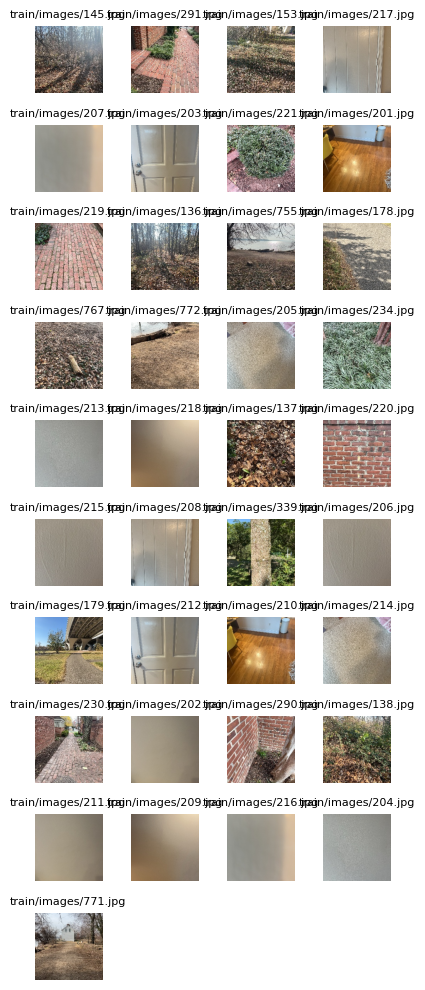

In [52]:
df_zero = df_train[df_train["DBH"] == 0]
show_random_images(df_zero, base_path=base_path / df_train["image_path"][0].split("/")[0] , k=50)

In [ ]:
# clean dataset


'train'